In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords

Embedding + Conv1D + 10 epochs = 0.85808 (test acc)


In [2]:
from keras.datasets import imdb
from keras import models,layers
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
max_features=10000
max_len=500
batch_size=32

In [0]:
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [0]:
(X_train,y_train),(X_test,y_test)= imdb.load_data(num_words=max_features)
np.load = np_load_old

In [6]:
X_train.shape,X_test.shape

((25000,), (25000,))

In [7]:
set(y_train)

{0, 1}

In [0]:
# padding the data to get every sequence to same length

X_train=pad_sequences(X_train,maxlen= max_len)
X_test = pad_sequences(X_test,maxlen=max_len)

In [9]:
X_train.shape,X_test.shape

((25000, 500), (25000, 500))

In [10]:
model = models.Sequential()
model.add(layers.Embedding(max_features,32,input_length=max_len))
model.add(layers.Conv1D(32,5,activation='relu'))
model.add(layers.MaxPool1D(3))
model.add(layers.Conv1D(32,5,activation='relu'))
model.add(layers.MaxPool1D(3))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

W0820 07:03:15.333094 140130874333056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 07:03:15.358538 140130874333056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 07:03:15.362433 140130874333056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 07:03:15.410571 140130874333056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0820 07:03:15.439902 140130874333056 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 32)           5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 165, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 161, 32)           5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 53, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 53, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1696)              0         
__________

In [11]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['acc'])


W0820 07:03:15.523441 140130874333056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 07:03:15.554446 140130874333056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0820 07:03:15.561678 140130874333056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
h= model.fit(X_train,y_train,batch_size=batch_size,epochs=10,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.0125 - acc: 0.9986 - val_loss: 1.3154 - val_acc: 0.8784
Epoch 2/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.0116 - acc: 0.9982 - val_loss: 1.2505 - val_acc: 0.8700
Epoch 3/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.0071 - acc: 0.9990 - val_loss: 1.4544 - val_acc: 0.8702
Epoch 4/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.0166 - acc: 0.9986 - val_loss: 1.2580 - val_acc: 0.8780
Epoch 5/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.0071 - acc: 0.9990 - val_loss: 1.4032 - val_acc: 0.8798
Epoch 6/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.0125 - acc: 0.9988 - val_loss: 1.3811 - val_acc: 0.8794
Epoch 7/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.0077 - acc: 0.9990 - val_loss: 1.4509 - val_acc:

In [0]:
loss=h.history['loss']
val_loss=h.history['val_loss']
acc= h.history['acc']
val_acc=h.history['val_acc']

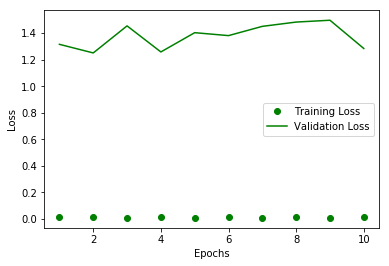

In [28]:
epochs=range(1,11)

plt.plot(epochs,loss,'go',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

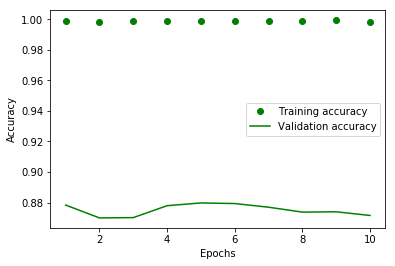

In [29]:
plt.plot(epochs,acc,'go',label='Training accuracy')
plt.plot(epochs,val_acc,'g',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
model.evaluate(X_test,y_test)

25000/25000 [==============================] - 10s 412us/step


[1.3936553786148131, 0.85808]